<a href="https://colab.research.google.com/github/rosangithub/ML/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [3]:

dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

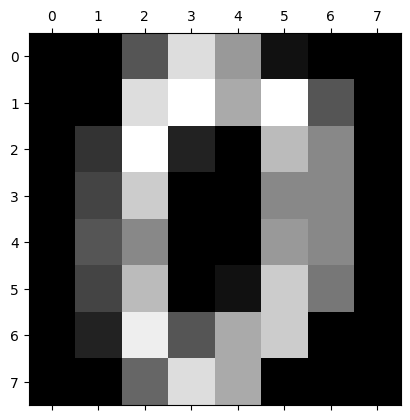

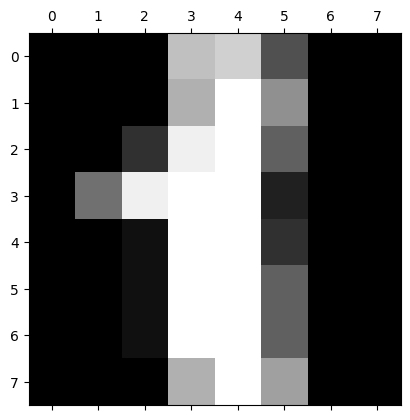

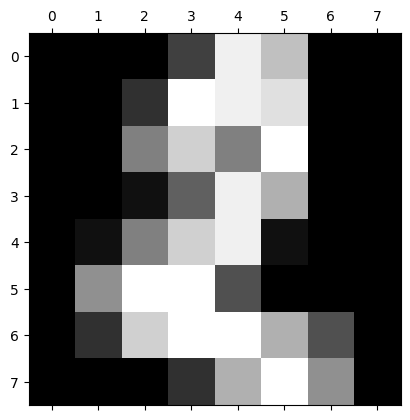

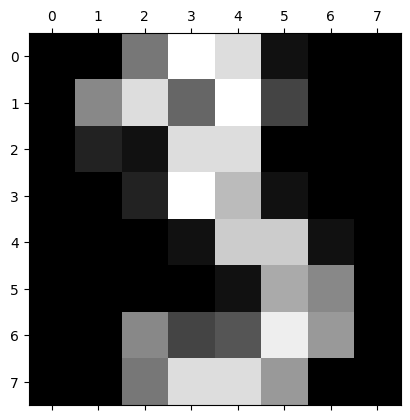

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.gray()
for i in range(4):
  plt.matshow(digits.images[i])

In [6]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
df['target']=digits.target

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [10]:
from sklearn.model_selection import train_test_split


In [12]:
X=df.drop(['target'],axis=1)

In [13]:
y=df['target']

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
564,0.0,0.0,1.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,13.0,16.0,15.0,1.0,0.0
1750,0.0,0.0,7.0,16.0,16.0,15.0,8.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,10.0,15.0,10.0,4.0,0.0,0.0
935,0.0,0.0,3.0,15.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,14.0,5.0,0.0,0.0
652,0.0,0.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,11.0,16.0,14.0,7.0,0.0
1422,0.0,0.0,0.0,11.0,16.0,16.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,0.0,0.0,15.0,14.0,15.0,9.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,10.0,16.0,15.0,4.0,0.0,0.0
152,0.0,0.0,6.0,13.0,10.0,3.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,8.0,14.0,13.0,12.0,4.0,0.0
1315,0.0,0.0,6.0,8.0,15.0,13.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,8.0,16.0,10.0,0.0,0.0,0.0
129,0.0,0.0,7.0,13.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,13.0,10.0,0.0,0.0,0.0


In [17]:
len(X_train)

1437

In [18]:
len(X_test)

360

In [19]:
y_train

,target
564,0
1750,3
935,0
652,6
1422,7
...,...
1532,5
152,2
1315,8
129,8


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
model=RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)
print("model trained")

model trained


In [32]:
model.score(X_test,y_test)

0.9722222222222222

In [34]:
y_pred=model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 29,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  1, 38,  0,  1,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

Text(95.72222222222221, 0.5, 'Truth')

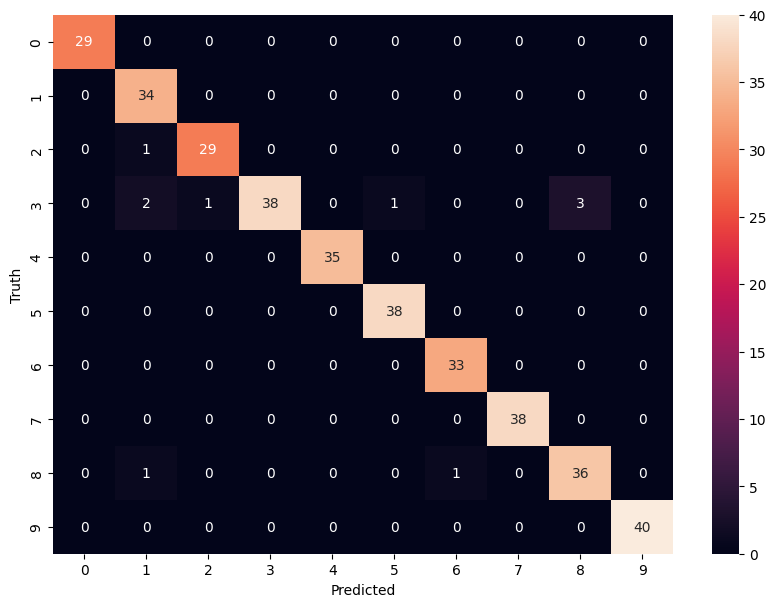

In [39]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')